In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(pd.read_csv("../assets/normalized_pyramid_data.csv"))

## Camilo's sample queries (6/26)

In [ ]:
'''
df[df["dynasty"] == 3][df["exterior_material"] == "Limestone"][df["start_of_reign"] <= 2700][df["end_of_reign"] >= 2550]

df[df["superstructure_type"] == "Pyramid"]["width"]

len(df[df["gender"] == "King"][df["period"] == "Old Kingdom"])

df[df["dynasty"] >= 5][df["dynasty"] <= 7][df["state_of_completion"] == "Completed"]
'''

In [ ]:
kings = df[df['gender'] == 'King']

In [ ]:
# Not sure of the point of this; Brought over from visualizations

start_reign = df["start_of_reign"].notnull()
end_reign = df["end_of_reign"].notnull()
reign_df = df[start_reign & end_reign]

In [ ]:
# Find the number of queen pyramids at each complex

queens = df[df['gender'] == 'Queen']
queens[['gender', 'pyramid_complex']].groupby('pyramid_complex').count()

In [ ]:
# Compare the number of king and queen pyramids at each confirmed complex

key = ['unknown', 'pyramid?']
complexes = df[~df['pyramid_complex'].isin(key)]

kings_and_queens = complexes.groupby('pyramid_complex')['gender'].value_counts().unstack()
kings_and_queens

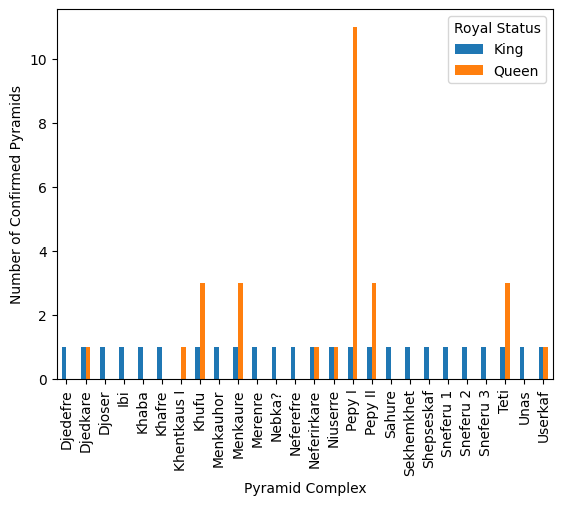

In [36]:
plt = kings_and_queens.plot.bar(xlabel='Pyramid Complex', ylabel='Number of Confirmed Pyramids')
plt.legend(title='Royal Status')

In [ ]:
# Count all known casing types

df[df['casing'] != 'Unknown']['casing'].value_counts()

In [ ]:
# See the types of casing during each dyansty

dynasty_casing = df.groupby('dynasty')['casing'].value_counts().unstack()
dynasty_casing

In [30]:
# See the distribution of pyramids between genders among the dynasties

dynasty_pyramids = df.groupby('dynasty')['gender'].value_counts().unstack()
dynasty_pyramids

gender,King,Queen
dynasty,,
3.0,4.0,NaN
4.0,8.0,7.0
5.0,8.0,4.0
6.0,9.0,17.0
7.0,9.0,NaN
8.0,6.0,NaN


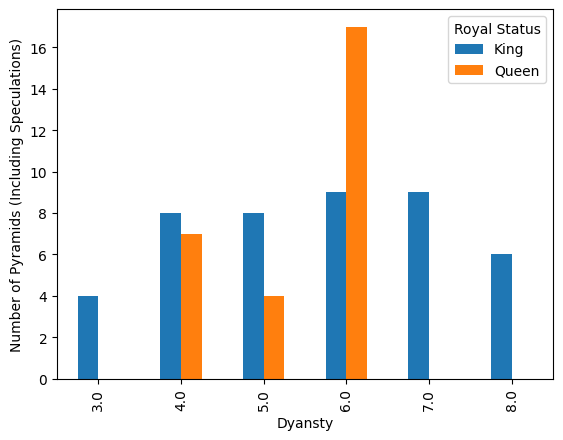

In [37]:
plt = dynasty_pyramids.plot.bar(xlabel='Dyansty', ylabel='Number of Pyramids (Including Speculations)')
plt.legend(title='Royal Status')

In [44]:
queen_data = queens[['royal_mother_title', 'likely_wife', 'wife_title', 'vizier', 'regent']]
queen_data

,royal_mother_title,likely_wife,wife_title,vizier,regent
8,False,True,True,False,False
9,False,True,False,False,False
10,False,True,True,False,False
14,False,True,True,False,False
15,False,True,False,False,False
16,False,True,False,False,False
18,True,False,False,False,True
20,True,True,True,False,False
23,True,True,True,False,False
26,False,True,True,False,False


In [45]:
queen_data.value_counts()

royal_mother_title  likely_wife  wife_title  vizier  regent
False               True         True        False   False     11
True                True         True        False   False      6
False               True         False       False   False      5
                                 True        True    False      2
True                True         True        False   True       2
                    False        False       False   False      1
                                                     True       1
Name: count, dtype: int64